In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sys
import seaborn as sb

In [2]:
def get_data():
    train_data = pd.read_csv("train.csv")
    test_data = pd.read_csv("test.csv")
    return train_data, test_data
train_data,test_data = get_data()
train_features = train_data.drop(['Survived'],axis=1)
#test_features = test_data.drop(['Survived'],axis=1)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [3]:
train_features = train_features.drop(['Name','PassengerId','Ticket','Cabin','Embarked'],axis=1)
test_features = test_data.drop(['Name','PassengerId','Ticket','Cabin','Embarked'],axis=1)
labels = 'Survived'
data_one = train_data.filter(['Age','SibSp','Fare','Parch'])
data_two = ['Sex','Pclass']
data_one.describe()
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       714 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.8+ KB


In [4]:
#data preprocessing 
train_mid = 28
new_age = train_features['Age'].fillna(train_mid)
train_features['Age'] = new_age
test_mid = 27
test_features['Age'] = test_mid
train_features.info()
test_features.describe()
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null int64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 19.7+ KB


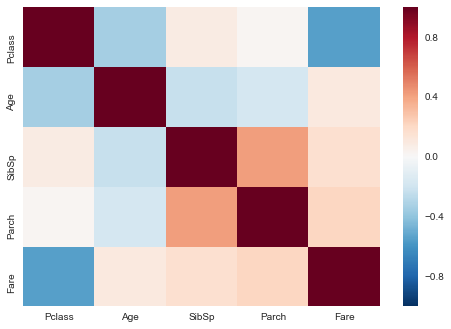

In [5]:
sb.heatmap(train_features.corr())

In [6]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
SibSp     891 non-null int64
Parch     891 non-null int64
Fare      891 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.8+ KB


In [7]:
train_features = train_features.drop(['Fare','Parch'],axis=1)
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass    891 non-null int64
Sex       891 non-null object
Age       891 non-null float64
SibSp     891 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.9+ KB


In [8]:
from sklearn import linear_model

In [9]:
train_features = train_features.replace({'Sex':{'female':0,'male':1}})
log_model = linear_model.LogisticRegression()
X = train_features
Y = train_data.loc[:,"Survived"]
log_model.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Pclass    891 non-null int64
Sex       891 non-null int64
Age       891 non-null float64
SibSp     891 non-null int64
dtypes: float64(1), int64(3)
memory usage: 27.9 KB


In [11]:
preds = log_model.predict(X = train_features)
pd.crosstab(preds,train_data["Survived"])

Survived,0,1
row_0,,
0,482,112
1,67,230


In [12]:
test_features = test_features.drop(['Fare','Parch'],axis=1)
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Sex       418 non-null object
Age       418 non-null int64
SibSp     418 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.1+ KB


In [13]:
# Make test set predictions
test_features = test_features.replace({'Sex':{'female':0,'male':1}})
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
Pclass    418 non-null int64
Sex       418 non-null int64
Age       418 non-null int64
SibSp     418 non-null int64
dtypes: int64(4)
memory usage: 13.1 KB


In [14]:
# Make test set predictions
test_preds = log_model.predict(X=test_features)
# Create a submission for Kaggle
submission = pd.DataFrame({"PassengerId":test_data["PassengerId"],
                           "Survived":test_preds})
# Save submission to CSV
submission.to_csv("gender_submission.csv", 
                  index=False)